# 1. Approximating Building

The building are approximated using 7-bit Geohashes (<https://en.wikipedia.org/wiki/Geohash>)

In [1]:
import numpy as np
import pygeohash as pgh


import pandas as pd
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import Image

## Creating ID Key for all the Incidents

In [2]:
permits = pd.read_table('../data/detroit-demolition-permits.tsv')
start_id, end_id = 0, len(permits)
permits['unique_id'] = range(start_id, end_id)

In [3]:
violations = pd.read_csv('../data/detroit-blight-violations.csv')
start_id += len(permits)
end_id += len(violations)
violations['unique_id'] = range(start_id, end_id)

C:\Users\sumit\Anaconda3\envs\sdcnd\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
crimes = pd.read_csv('../data/detroit-crime.csv')
start_id += len(violations)
end_id += len(crimes)
crimes['unique_id'] = range(start_id, end_id)

C:\Users\sumit\Anaconda3\envs\sdcnd\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
calls = pd.read_csv('../data/detroit-311.csv')
start_id += len(crimes)
end_id += len(calls)
calls['unique_id'] = range(start_id, end_id)

## Extracting Latitude-Longitude and Assigning Building ID

### Permits

In [6]:
permits.head(1)

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom,unique_id
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184.0,3.0,NaN,0.0,829.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,0


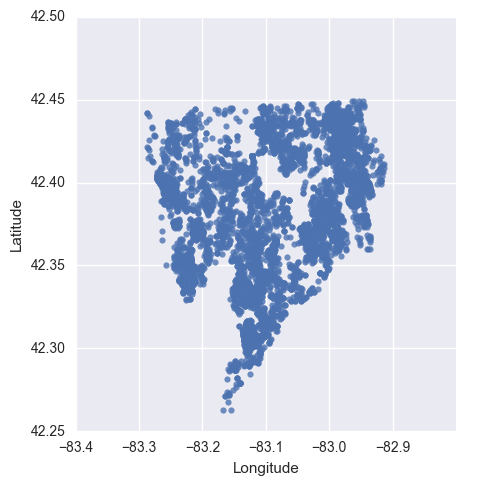

In [7]:
permits.dropna(subset=['site_location'], inplace=True)

permits['Coordinates'] = permits['site_location'].map(lambda x: x.split('\n')[-1])
permits['Coordinates'].replace('', np.nan, inplace=True)
permits.dropna(subset=['Coordinates'], inplace=True)

permits['Latitude'] = permits['Coordinates'].map(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
permits['Longitude'] = permits['Coordinates'].map(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)
permits = permits[(permits['Latitude'] >= 42.26) & (permits['Latitude'] <= 42.45)]
permits = permits[(permits['Longitude'] >= -83.29) & (permits['Longitude'] <= -82.91)]

sns.lmplot('Longitude', 'Latitude', data=permits, fit_reg=False)

In [8]:
permits['BuildingID'] = permits.apply(lambda row: pgh.encode(row['Latitude'], row['Longitude'], precision=7), axis=1)
permits.head(1)

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom,unique_id,Coordinates,Latitude,Longitude,BuildingID
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184.0,3.0,NaN,0.0,829.0,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227.0,NaN,"4331 BARHAM\nDetroit, MI\n(42.394106, -82.9474)","65 CADILLAC\nDETROIT, MI\n(42.331741326000042,...","13500 FOLEY\nDETROIT, MI\n(42.379332, -83.177501)",NaN,0,"(42.394106, -82.9474)",42.394106,-82.9474,dpt10mx


### Violations

In [9]:
violations.head(1)

,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,MailingZipCode,NonUsAddressCode,Country,TicketIssuedDT,TicketIssuedTime,HearingDT,CourtTime,ViolationCode,ViolDescription,Disposition,FineAmt,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress,unique_id
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,48226,NaN,NaN,01/01/38440 12:00:00 AM,12:00:00,01/01/38474 12:00:00 AM,9:00AM,22-2-20,Burning solid waste in open fires,Responsible By Determination,$1500.00,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630...",7133


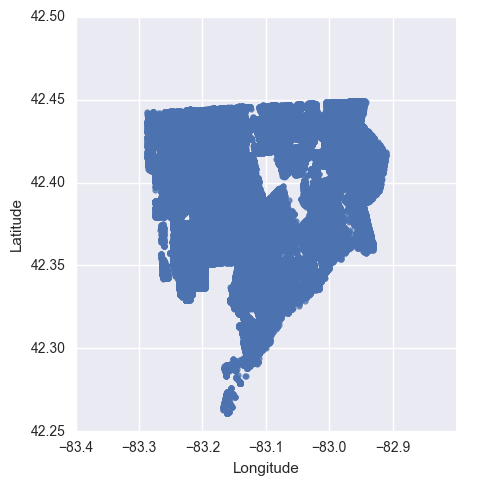

In [10]:
violations.dropna(subset=['ViolationAddress'], inplace=True)
violations['Coordinates'] = violations['ViolationAddress'].apply(lambda x: x.split('\n')[-1])
violations['Coordinates'].replace('', np.nan, inplace=True)
violations.dropna(subset=['Coordinates'], inplace=True)

violations['Latitude'] = violations['Coordinates'].apply(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
violations['Longitude'] = violations['Coordinates'].apply(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)
violations = violations[(violations['Latitude'] >= 42.26) & (violations['Latitude'] <= 42.45)]
violations = violations[(violations['Longitude'] >= -83.29) & (violations['Longitude'] <= -82.91)]

sns.lmplot('Longitude', 'Latitude', data=violations, fit_reg=False)

In [11]:
violations['BuildingID'] = violations.apply(lambda row: pgh.encode(row['Latitude'], row['Longitude'], precision=7), axis=1)
violations.head(1)

,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,MailingZipCode,NonUsAddressCode,Country,TicketIssuedDT,TicketIssuedTime,HearingDT,CourtTime,ViolationCode,ViolDescription,Disposition,FineAmt,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress,unique_id,Coordinates,Latitude,Longitude,BuildingID
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,48226,NaN,NaN,01/01/38440 12:00:00 AM,12:00:00,01/01/38474 12:00:00 AM,9:00AM,22-2-20,Burning solid waste in open fires,Responsible By Determination,$1500.00,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0.0,0,"2566 GRAND BLVD\nDetroit, MI\n(42.363182370000...","743 Beaubien\nDetroit, MI 48226\n(42.333730630...",7133,"(42.36318237000006, -83.09167672099994)",42.363182,-83.091677,dpsbvpy


### Crimes

In [12]:
crimes.head(1)

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION,unique_id
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)",314937


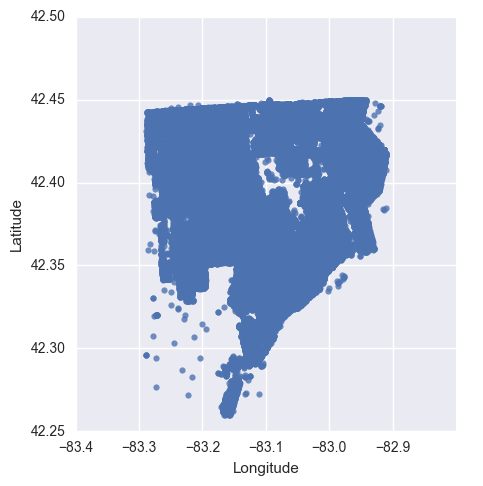

In [13]:
crimes['Coordinates'] = crimes['LOCATION'].map(lambda x: x.split('\n')[-1])
crimes['Coordinates'] = crimes['Coordinates'].replace('', np.nan)
crimes.dropna(subset=['Coordinates'], inplace=True)

crimes['Latitude'] = crimes['Coordinates'].map(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
crimes['Longitude'] = crimes['Coordinates'].map(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)
crimes = crimes[(crimes['Latitude'] >= 42.26) & (crimes['Latitude'] <= 42.45)]
crimes = crimes[(crimes['Longitude'] >= -83.29) & (crimes['Longitude'] <= -82.91)]

sns.lmplot('Longitude', 'Latitude', data=crimes, fit_reg=False)

In [14]:
crimes['BuildingID'] = crimes.apply(lambda row: pgh.encode(row['Latitude'], row['Longitude'], precision=7), axis=1)
crimes.head(1)

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION,unique_id,Coordinates,Latitude,Longitude,BuildingID
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)",314937,"(42.3676, -83.1219)",42.3676,-83.1219,dpsch8b


### 311 Calls

In [15]:
calls.head(1)

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image,unique_id
0,1516722,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN,434868


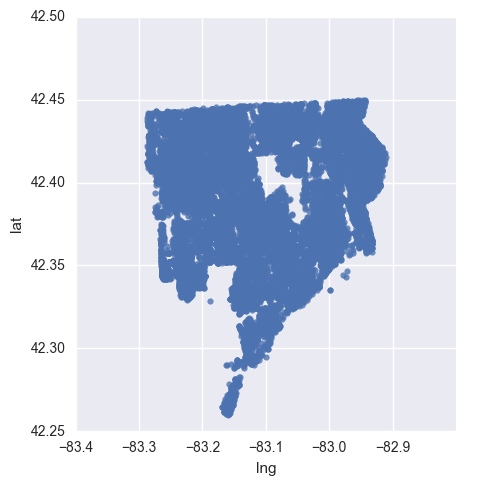

In [16]:
calls = calls[(calls['lat'] >= 42.26) & (calls['lat'] <= 42.45)]
calls = calls[(calls['lng'] >= -83.29) & (calls['lng'] <= -82.91)]

sns.lmplot('lng', 'lat', data=calls, fit_reg=False)

In [17]:
calls['BuildingID'] = calls.apply(lambda row: pgh.encode(row['lat'], row['lng'], precision=7), axis=1)
crimes.head(1)

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION,unique_id,Coordinates,Latitude,Longitude,BuildingID
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001.0,06/03/2015 12:00:00 AM,2,1007.0,10.0,City Council District 5,PETOSKEY-OTSEGO,5334.0,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\n09100\n(42.3676, -83.1219)",314937,"(42.3676, -83.1219)",42.3676,-83.1219,dpsch8b


### Storing the DataFrames

In [18]:
permits.to_csv('../data/permits.csv', index=False, encoding='utf-8')
violations.to_csv('../data/violations.csv', index=False, encoding='utf-8')
crimes.to_csv('../data/crimes.csv', index=False, encoding='utf-8')
calls.to_csv('../data/calls.csv', index=False, encoding='utf-8')